# Actividad módulo 1. Reducción de dimensiones I

In [28]:
## Bibliotecas de tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from numpy import linalg as LA

pd.options.display.max_rows = 10 # Codigo para cambiar las lines mostradas 

In [27]:
DF_iris = pd.read_csv("Iris.csv")
DF_iris

DF_iris = DF_iris.set_index("variety")
DF_iris

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.1,3.5,1.4,0.2
Setosa,4.9,3.0,1.4,0.2
Setosa,4.7,3.2,1.3,0.2
Setosa,4.6,3.1,1.5,0.2
Setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
Virginica,6.7,3.0,5.2,2.3
Virginica,6.3,2.5,5.0,1.9
Virginica,6.5,3.0,5.2,2.0


In [6]:
index = DF_iris.index
renglones = len(index)

renglones

150

In [29]:
## Estandarización de las variables

DF_irisEs = StandardScaler().fit_transform(DF_iris)

DF_irisEs

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [8]:
# Cálculo de la matriz de correlaciones

MC = (1/renglones) * np.dot(DF_irisEs.T, DF_irisEs)
MC

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [9]:
## Entrenamiento del modelo PCA

pca_pipe = make_pipeline(StandardScaler(), PCA())

pca_pipe.fit(DF_iris)

## Extracción del modelo entrenado

modelo_pcaI = pca_pipe.named_steps["pca"]

## Impresión de Eigenvalores

resultados = LA.eigvals(MC)

print("Eigenvalores: ")
print(resultados)

Eigenvalores: 
[2.91849782 0.91403047 0.14675688 0.02071484]


In [10]:
## Porcentaje de varianza explicada por componentes

print("Porcentaje de varianza por componente:")
print(modelo_pcaI.explained_variance_ratio_)

Porcentaje de varianza por componente:
[0.72962445 0.22850762 0.03668922 0.00517871]


In [11]:
## Cálculo de los eigenvectores

print("Eigenvectores por renglon: ")
pd.DataFrame(data = modelo_pcaI.components_,
             columns = DF_iris.columns,
             index = ["PC1", "PC2", "PC3", "PC4"])

Eigenvectores por renglon: 


,sepal.length,sepal.width,petal.length,petal.width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


In [12]:
# Proyección de los componentes

proyeccionesI = np.dot(modelo_pcaI.components_, DF_irisEs.T)

proyeccionesI = pd.DataFrame(proyeccionesI, index = ["PC1", "PC2", "PC3", "PC4"])
proyeccionesI = proyeccionesI.transpose().set_index(DF_iris.index)

proyeccionesI

,PC1,PC2,PC3,PC4
variety,,,,
Setosa,-2.264703,0.480027,-0.127706,-0.024168
Setosa,-2.080961,-0.674134,-0.234609,-0.103007
Setosa,-2.364229,-0.341908,0.044201,-0.028377
Setosa,-2.299384,-0.597395,0.091290,0.065956
Setosa,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
Virginica,1.870503,0.386966,0.256274,-0.389257
Virginica,1.564580,-0.896687,-0.026371,-0.220192
Virginica,1.521170,0.269069,0.180178,-0.119171


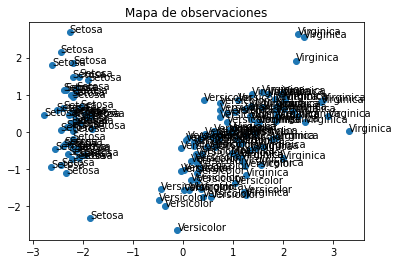

In [13]:
## Graficación de las proyecciones para revisión de las agrupaciones

x = proyeccionesI.iloc[:,0]
y = proyeccionesI.iloc[:,1]
z = DF_iris.index

X = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title("Mapa de observaciones")
ax.scatter(x,y)

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))

## Observaciones
### Al momento de hacer las proyecciones, se puede apreciar una agrupación separada del resto en la izquierda del gráfico, la cual corresponde a la variante de iris Setosa, mientras que las otras dos variantes se encuentran agrupadas del lado derecho, teniendo una separación clara entre virginica y versicolor.

In [14]:
ComponentesI = pd.DataFrame(data = modelo_pcaI.components_,
                            columns = DF_iris.columns,
                            index = ["PC1", "PC2", "PC3", "PC4"])

ComponentesI = ComponentesI.iloc[0:2, :]
ComponentesI = ComponentesI.T
ComponentesI

,PC1,PC2
sepal.length,0.521066,0.377418
sepal.width,-0.269347,0.923296
petal.length,0.580413,0.024492
petal.width,0.564857,0.066942


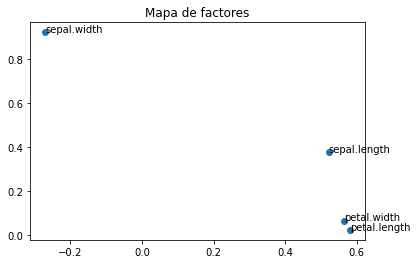

In [15]:
x = ComponentesI.iloc[:,0]
y = ComponentesI.iloc[:,1]
z = ComponentesI.index

X = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title("Mapa de factores")
ax.scatter(x,y)

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))

## Observaciones
### Al invertir y aplicar la reducción a los datos de las características de las variantes de iris, podemos ver que la mayor correlación se encuentra entre las medidas del petalo (Ancho y largo), siendo los datos que más coincidian con todas las variantes de las iris, mientras que en el caso de las medidas del sepalo, apreciamos que existe mucha discrepancia entre el largo y ancho, por lo que estas medidas pueden tener muchas variaciones entre los individuos de una misma agrupación.